<a href="https://colab.research.google.com/github/jose1138/IA/blob/main/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget  \https://www.dropbox.com/s/0j7s080efbfh8gc/cats_and_dogs_small.zip?dl=0\
  -O cats_and_dogs_small.zip

--2024-06-05 23:09:13--  https://www.dropbox.com/s/0j7s080efbfh8gc/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /scl/fi/2plirjv2ftygukrfaetlq/cats_and_dogs_small.zip?rlkey=1h03v7cl9u3i3szn85sj8p597&dl=0 [following]
--2024-06-05 23:09:14--  https://www.dropbox.com/scl/fi/2plirjv2ftygukrfaetlq/cats_and_dogs_small.zip?rlkey=1h03v7cl9u3i3szn85sj8p597&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c37b2604b3b50f2e82833a7d3.dl.dropboxusercontent.com/cd/0/inline/CUQ1APe_F7HLeWoQnZUaHssj4WikJgO0yXNBnxfJtJlRdH0SS8pv40ebWiU7su5xhmetpavPtHRCxyMWnO6SwuNEofERukmAarsV5HFfHn6Te4Ti7LB16dpaDvIfGvePXopdrjquY7LlkVHWhPdysFCA/file# [following]
--2024-06-05 23:09:14--  https://uc0c37b2604b3b50f2e82833a7d3.dl.dropboxuse

In [ ]:
#DESCOMPRIMIR LA BASE DE DATOS

import os
import zipfile

local_zip='cats_and_dogs_small.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('')
zip_ref.close()

In [ ]:
import glob, cv2, numpy as np
from tqdm import tqdm
categorias=['cats','dogs']

X=[]
Y=[]

for categoria in tqdm(categorias):
  ruta_imgs=glob.glob('./cats_and_dogs_small/'+categoria+'/*.jpg')
  for ruta_img in ruta_imgs:
    img=cv2.resize(cv2.imread(ruta_img), (150,150))
    X.append(img)
    if categoria=='cats':
      Y.append(0)
    else:
      Y.append(1)

glob.glob('./cats_and_dogs_small/'+categoria+'/*.*')

100%|██████████| 2/2 [00:14<00:00,  7.45s/it]


['./cats_and_dogs_small/dogs/dog.1842.jpg',
 './cats_and_dogs_small/dogs/dog.711.jpg',
 './cats_and_dogs_small/dogs/dog.321.jpg',
 './cats_and_dogs_small/dogs/dog.114.jpg',
 './cats_and_dogs_small/dogs/dog.828.jpg',
 './cats_and_dogs_small/dogs/dog.1719.jpg',
 './cats_and_dogs_small/dogs/dog.1370.jpg',
 './cats_and_dogs_small/dogs/dog.801.jpg',
 './cats_and_dogs_small/dogs/dog.1471.jpg',
 './cats_and_dogs_small/dogs/dog.392.jpg',
 './cats_and_dogs_small/dogs/dog.302.jpg',
 './cats_and_dogs_small/dogs/dog.333.jpg',
 './cats_and_dogs_small/dogs/dog.1438.jpg',
 './cats_and_dogs_small/dogs/dog.1224.jpg',
 './cats_and_dogs_small/dogs/dog.146.jpg',
 './cats_and_dogs_small/dogs/dog.1534.jpg',
 './cats_and_dogs_small/dogs/dog.638.jpg',
 './cats_and_dogs_small/dogs/dog.1915.jpg',
 './cats_and_dogs_small/dogs/dog.843.jpg',
 './cats_and_dogs_small/dogs/dog.1349.jpg',
 './cats_and_dogs_small/dogs/dog.512.jpg',
 './cats_and_dogs_small/dogs/dog.1783.jpg',
 './cats_and_dogs_small/dogs/dog.89.jpg',
 '

In [ ]:
X=np.asarray(X).astype('uint8')
Y=np.expand_dims(np.asarray(Y).astype('uint8'),axis=1)

In [ ]:
from sklearn.utils import shuffle

X,Y=shuffle(X,Y)
Y

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=uint8)

In [ ]:
import tensorflow as tf

Y=tf.keras.utils.to_categorical(Y)
X=X.astype('float32')
X/=255.0

In [ ]:
#Dividir en test
x_test=X[3600:4000]
y_test=Y[3600:4000]

x_train,y_train=X[0:3600],Y[0:3600]

In [ ]:
#ARQUITECTURA DE LA CNN

import tensorflow as tf

#RED NEURONAL ARTIFICIAL
#EL NÚMERO DE NEURONAS EN LA CAPA OCULTA ES 3
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #ANN
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='sigmoid')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
pip install visualkeras

In [ ]:
import visualkeras as vk

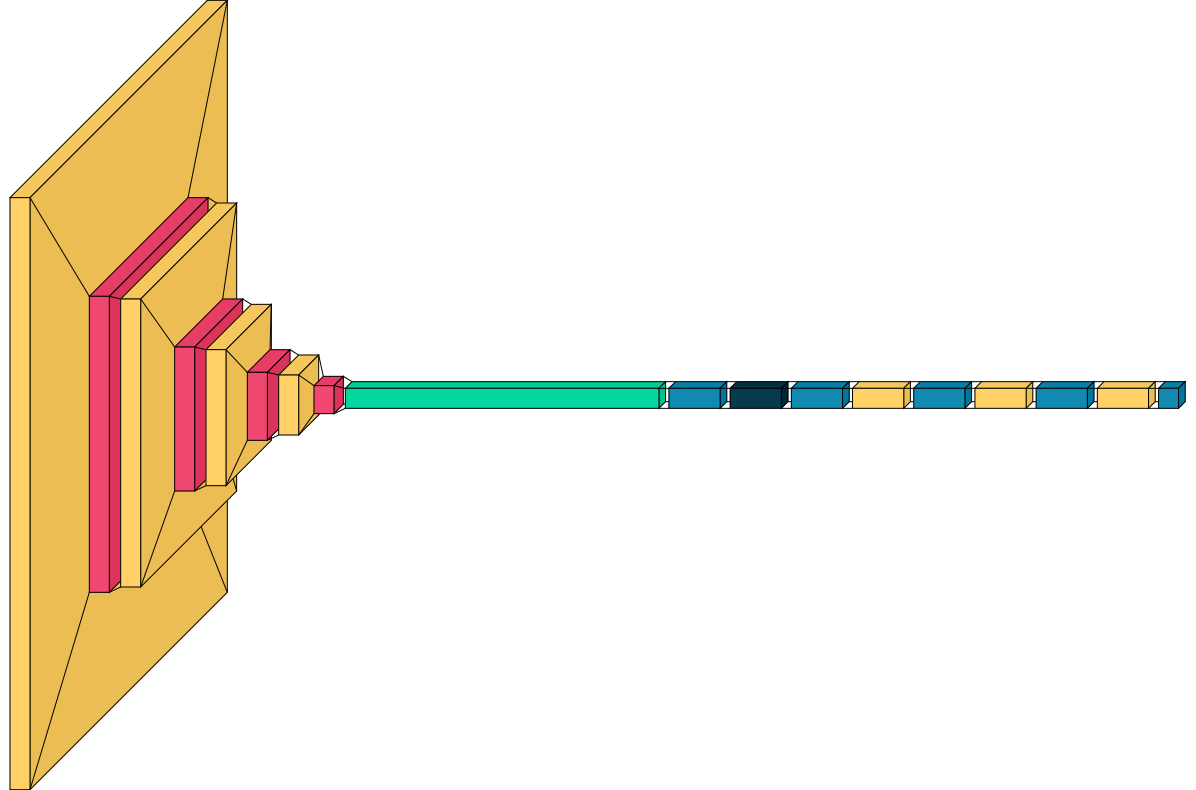

In [ ]:
vk.layered_view(model).show()
vk.layered_view(model,to_file="CNN.png")
vk.layered_view(model,to_file="CNN.png").show()
vk.layered_view(model)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
#ENTRENAR RED

history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
57/57 [==============================] - 25s 103ms/step - loss: 0.6718 - acc: 0.5928 - val_loss: 0.6875 - val_acc: 0.5050
Epoch 2/10
57/57 [==============================] - 3s 49ms/step - loss: 0.6097 - acc: 0.6647 - val_loss: 0.6777 - val_acc: 0.6750
Epoch 3/10
57/57 [==============================] - 3s 52ms/step - loss: 0.5576 - acc: 0.7186 - val_loss: 0.6607 - val_acc: 0.6350
Epoch 4/10
57/57 [==============================] - 3s 49ms/step - loss: 0.4978 - acc: 0.7675 - val_loss: 0.6758 - val_acc: 0.5275
Epoch 5/10
57/57 [==============================] - 3s 47ms/step - loss: 0.4584 - acc: 0.7836 - val_loss: 0.6261 - val_acc: 0.6450
Epoch 6/10
57/57 [==============================] - 3s 47ms/step - loss: 0.3831 - acc: 0.8242 - val_loss: 0.6269 - val_acc: 0.5925
Epoch 7/10
57/57 [==============================] - 3s 48ms/step - loss: 0.3321 - acc: 0.8583 - val_loss: 0.5904 - val_acc: 0.6575
Epoch 8/10
57/57 [==============================] - 3s 55ms/step - loss: 0.2923 -

In [ ]:
y_pred=np.argmax(model.predict(x_test),axis=1)

13/13 [==============================] - 1s 10ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

reporte=classification_report(np.argmax(y_test,axis=1), y_pred, target_names=categorias)

In [ ]:
cm=confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

[[188  10]
 [120  82]]


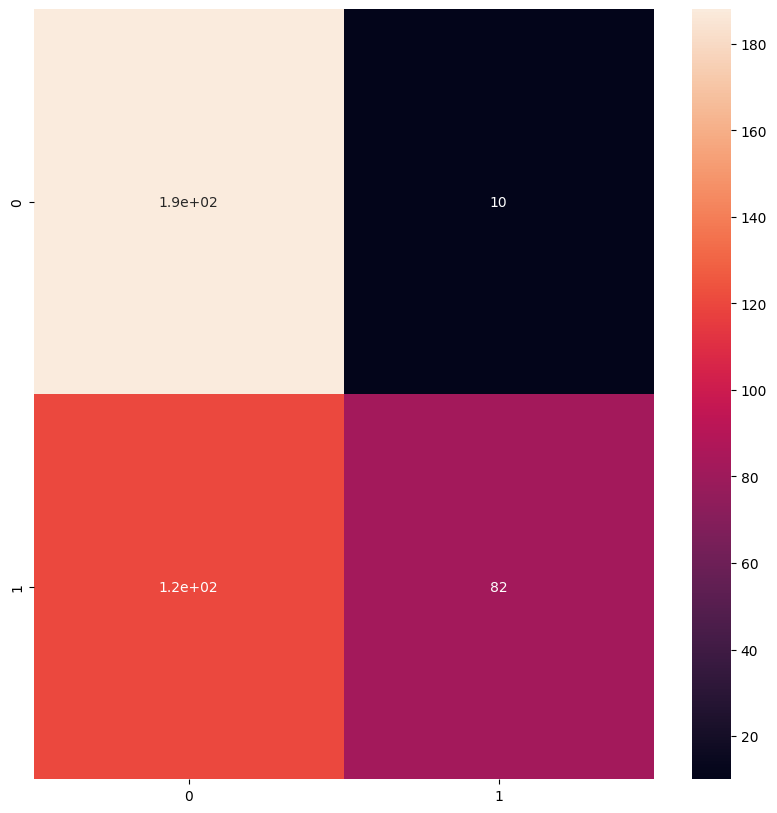

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm=confusion_matrix(np.argmax(y_test,axis=1),y_pred)
cm=pd.DataFrame(cm,range(2),range(2))
plt.figure(figsize=(10,10))

sns.heatmap(cm,annot=True)
plt.show()

1/1 [==============================] - 0s 52ms/step
[[0.62969995 0.33249822]]
LA IMAGEN CARGADA SE PREDICE COMO: cats


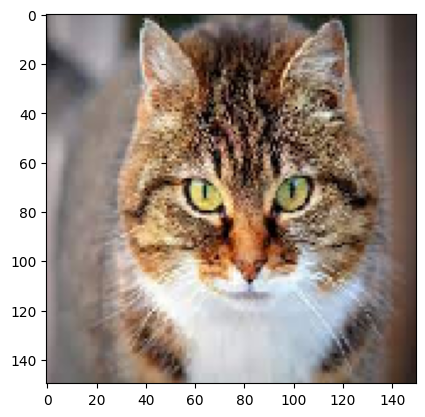

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
# Cargar imagen de prueba
img = load_img('/content/drive/MyDrive/PRUEBAS/gato_prueba.jpg', target_size=(150, 150))
imag = img_to_array(img)
imaga = np.expand_dims(imag, axis=0)
img_array = imaga.astype('float32') / 255.0
#Predicción sobre imagen de preba
ypred = model.predict(img_array)
print(ypred)
a = ypred[0]
op = categorias[np.argmax(a)]
plt.imshow(img)
print("LA IMAGEN CARGADA SE PREDICE COMO: " + str(op))

1/1 [==============================] - 0s 33ms/step
[[0.9846917  0.01271615]]
LA IMAGEN CARGADA SE PREDICE COMO: cats


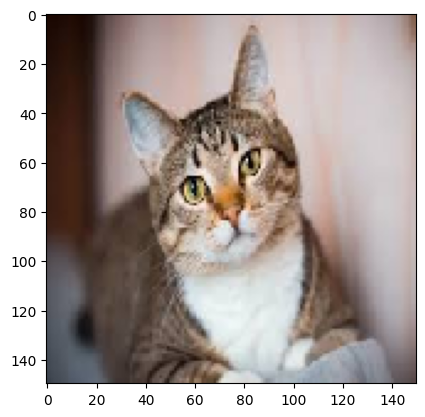

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
# Cargar imagen de prueba
img = load_img('/content/drive/MyDrive/PRUEBAS/gato_prueba_2.jpg', target_size=(150, 150))
imag = img_to_array(img)
imaga = np.expand_dims(imag, axis=0)
img_array = imaga.astype('float32') / 255.0
#Predicción sobre imagen de preba
ypred = model.predict(img_array)
print(ypred)
a = ypred[0]
op = categorias[np.argmax(a)]
plt.imshow(img)
print("LA IMAGEN CARGADA SE PREDICE COMO: " + str(op))